# Libs

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import json
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
sns.set_style('whitegrid')
sns.set(font_scale=3,font="simhei")

#--- 改变字体
font = {
        'size'   : 22}
matplotlib.rc('font', **font)


#--- plt设置
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from statsmodels.stats.weightstats import ztest

## analysis focus on (rho, cv, kappa) = (0.3, 0.3, 1.0)

In [2]:
df = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/88/e_result.csv')
df = df.query('rho==0.3&cv==0.3&kappa==1.0')
for suffiex in ['', '_outsample']:
    df['total_cost'+suffiex] = df['f'] + df['h'] + df['unmet_demand'+suffiex]
    df['obj_second_stage'+suffiex] = df['obj'] - df['f'] - df['h']
    df['total_demand'+suffiex] =  np.fmax(df['sum_I']*df['utilization_rate'+suffiex], df['unmet_demand'+suffiex]/(1-df['fulfill_rate'+suffiex]))
    df.loc[df['total_demand'+suffiex]==np.inf, 'total_demand'+suffiex] = df['utilization_rate'+suffiex] * df['sum_I']
    df['unfulfill_rate'+suffiex] = 1 - df['fulfill_rate'+suffiex]
df.loc[df['model']=='co', 'model'] = 'CO'
df.loc[df['model']=='mv', 'model'] = 'MV'
df.loc[df['model']=='saa', 'model'] = 'SAA'
df.loc[df['model']=='det', 'model'] = 'DET'
print(df.shape)
df.columns

(600000, 31)


Index(['utilization_rate', 'fulfill_rate', 'event_fulfill_rate',
       'unmet_demand', 'cnt', 'model', 'obj', 'f', 'h', 'sum_I', 'sum_Z',
       'rho', 'cv', 'kappa', 'cpu_time', 'graph', 'utilization_rate_outsample',
       'fulfill_rate_outsample', 'event_fulfill_rate_outsample',
       'unmet_demand_outsample', 'speedup_cpu_time', 'speedup_node', 'node',
       'total_cost', 'obj_second_stage', 'total_demand', 'unfulfill_rate',
       'total_cost_outsample', 'obj_second_stage_outsample',
       'total_demand_outsample', 'unfulfill_rate_outsample'],
      dtype='object')

In [3]:
df

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,speedup_node,node,total_cost,obj_second_stage,total_demand,unfulfill_rate,total_cost_outsample,obj_second_stage_outsample,total_demand_outsample,unfulfill_rate_outsample
0,0.576874,1.00000,1.00,0.000000,0,CO,909.962442,79.0,646.59345,5227.977416,...,51,59,725.593450,184.368992,3015.883406,0.00000,725.593450,184.368992,2897.272983,0.000000
1,0.548528,1.00000,1.00,0.000000,1,CO,909.962442,79.0,646.59345,5227.977416,...,51,59,725.593450,184.368992,2867.694345,0.00000,725.593450,184.368992,2897.272983,0.000000
2,0.901693,0.93732,0.75,315.236366,2,CO,909.962442,79.0,646.59345,5227.977416,...,51,59,1040.829816,184.368992,5029.268802,0.06268,725.593450,184.368992,2897.272983,0.000000
3,0.581752,1.00000,1.00,0.000000,3,CO,909.962442,79.0,646.59345,5227.977416,...,51,59,725.593450,184.368992,3041.384842,0.00000,900.355496,184.368992,5380.649826,0.032480
4,0.717811,1.00000,1.00,0.000000,4,CO,909.962442,79.0,646.59345,5227.977416,...,51,59,725.593450,184.368992,3752.700307,0.00000,725.593450,184.368992,2897.272983,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.896957,1.00000,1.00,0.000000,995,SAA,973.157526,93.0,811.81348,4998.607849,...,-1,-1,904.813480,68.344046,4483.536512,0.00000,944.310709,68.344046,4368.573266,0.009041
599996,0.829014,1.00000,1.00,0.000000,996,SAA,973.157526,93.0,811.81348,4998.607849,...,-1,-1,904.813480,68.344046,4143.914965,0.00000,922.135147,68.344046,4737.363343,0.003656
599997,0.665939,1.00000,1.00,0.000000,997,SAA,973.157526,93.0,811.81348,4998.607849,...,-1,-1,904.813480,68.344046,3328.768329,0.00000,904.813480,68.344046,4116.131614,0.000000
599998,0.619972,1.00000,1.00,0.000000,998,SAA,973.157526,93.0,811.81348,4998.607849,...,-1,-1,904.813480,68.344046,3098.996320,0.00000,904.813480,68.344046,3579.912494,0.000000


## first stage deployment

In [4]:
data = df.groupby(['model', 'graph'], as_index=False).mean().groupby(['model']).describe()
data[['f','h', 'sum_I', 'sum_Z']].T

model                 CO           MV          SAA
f     count   200.000000   200.000000   200.000000
      mean     63.430000    63.255000    67.745000
      std      13.904018    13.680488    14.854063
      min      33.000000    33.000000    33.000000
      25%      53.000000    53.000000    57.750000
      50%      63.000000    63.000000    68.000000
      75%      72.250000    72.000000    79.000000
      max     103.000000    98.000000   111.000000
h     count   200.000000   200.000000   200.000000
      mean    668.470171   636.090782   660.215221
      std      66.492383    66.097081    70.458807
      min     535.541808   499.375081   478.915116
      25%     621.786552   590.318045   615.204750
      50%     669.558594   637.272293   657.389508
      75%     709.293748   676.350425   700.722128
      max     889.636976   850.550026   865.872271
sum_I count   200.000000   200.000000   200.000000
      mean   4944.173423  4638.283842  4903.426335
      std     201.058985   194.140917   300.332725
      min    4312.126954  4093.355954  4218.277479
      25%    4812.249985  4517.951231  4696.300665
      50%    4932.637142  4630.451584  4905.720769
      75%    5050.453895  4762.484285  5093.323705
      max    5475.260298  5151.220595  5679.800216
sum_Z count   200.000000   200.000000   200.000000
      mean      3.785000     3.770000     4.055000
      std       0.715075     0.720901     0.777817
      min       2.000000     2.000000     2.000000
      25%       3.000000     3.000000     4.000000
      50%       4.000000     4.000000     4.000000
      75%       4.000000     4.000000     5.000000
      max       5.000000     5.000000     6.000000

## first stage network properties

In [5]:
tmp_df = {'warehouses': [], 
          'num_links': [],
         'wh_degree': [],
         'dn_degree': [],
         'model': [],
         'graph': []}
for g in range(200):
    for k in range(1):
        path = f'D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/88/graph{g}/input/input{k}.txt'
        with open(path, 'r') as f:
            graph = json.loads(f.readline())['e_param']['graph']
        for model in ['co', 'saa', 'mv']:
            path = f'D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/88/graph{g}/output/output{k}_{model}.txt'
            with open(path, 'r') as f:
                Zs = json.loads(f.readline())['sol']['Z']
            
            links = np.asarray([graph[k] for k, z in enumerate(Zs) if z==1])
            
            tmp_df['warehouses'].append(links.shape[0])
            tmp_df['num_links'].append(links.sum())
            tmp_df['wh_degree'].append(links.sum()/links.shape[0])
            tmp_df['dn_degree'].append(links.sum()/links.shape[1])
            tmp_df['model'].append(model)
            tmp_df['graph'].append(g)

tmp_df = pd.DataFrame(tmp_df)
tmp_df.groupby(['model']).describe().T

FileNotFoundError: [Errno 2] No such file or directory: 'D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/88/graph0/input/input0.txt'

## second stage simulations

In [6]:
data = df.groupby(['model', 'graph'], as_index=False).mean().groupby(['model']).describe()
data[[ 'unmet_demand', 'total_cost', 'unmet_demand_outsample', 'total_cost_outsample']].T

model                                  CO           MV          SAA
unmet_demand           count   200.000000   200.000000   200.000000
                       mean     53.111971    96.142326    64.530406
                       std      12.249624    15.418560    31.656631
                       min      28.285276    64.180856     6.364888
                       25%      44.722865    85.150742    40.573291
                       50%      53.039648    95.583987    61.673828
                       75%      60.160873   105.215211    82.614651
                       max      94.595730   141.059991   178.852720
total_cost             count   200.000000   200.000000   200.000000
                       mean    785.012142   795.488108   792.490627
                       std      78.485677    80.124585    78.216243
                       min     615.394109   617.633081   625.745612
                       25%     728.449426   737.429878   738.884711
                       50%     788.906441   798.238417   796.124919
                       75%     832.650585   843.197381   837.896809
                       max    1046.189208  1052.610016  1048.797136
unmet_demand_outsample count   200.000000   200.000000   200.000000
                       mean     57.289758   108.714257    69.981950
                       std      15.075893    15.830139    38.837424
                       min      21.394957    70.160275     1.715552
                       25%      46.150620    97.461916    38.988536
                       50%      57.415466   107.283014    69.239383
                       75%      66.287483   118.543528    94.954650
                       max     106.246828   152.753572   179.188734
total_cost_outsample   count   200.000000   200.000000   200.000000
                       mean    789.189929   808.060038   797.942171
                       std      81.997859    81.291620    80.933410
                       min     621.735577   645.050477   627.122169
                       25%     730.961796   751.442271   744.810012
                       50%     793.638094   808.695268   799.236375
                       75%     838.655703   856.636147   846.956300
                       max    1050.851855  1060.964129  1059.223900

In [7]:
print('CO v.s. DET' ,(953.199337- 785.012142)/ 953.199337) 
print('MV v.s. DET' ,(953.199337- 795.488108)/ 953.199337) 
print('SAA v.s. DET' ,(953.199337- 792.490627)/ 953.199337)

CO v.s. DET 0.17644493493809466
MV v.s. DET 0.16545461466262015
SAA v.s. DET 0.16859926750032977


## paired t-test: H0: diff_{co-XX} >= 0 ; H1 diff < 0

In [8]:
data = df.groupby(['model', 'graph'], as_index=False).mean()
data = pd.merge(data.query('model!="CO"'), data.query('model=="CO"')[['graph', 'f', 'h', 'total_cost', 'total_cost_outsample',
                                                                      'unmet_demand', 'unmet_demand_outsample']], 
               on='graph', suffixes=('_xx', '_CO'))
for model in ['SAA', 'MV']:
    for col in ['f', 'h', 'unmet_demand', 'unmet_demand_outsample', 'total_cost', 'total_cost_outsample']:
        t, p_value = ztest(data.query(f'model=="{model}"')[f'{col}_CO'] - data.query(f'model=="{model}"')[f'{col}_xx'], value=0, alternative='smaller')
        print(f'h0: {col}_CO - {col}_{model} >= 0, p-value:', p_value)


h0: f_CO - f_SAA >= 0, p-value: 1.1659209353136872e-12
h0: h_CO - h_SAA >= 0, p-value: 0.9999391018334447
h0: unmet_demand_CO - unmet_demand_SAA >= 0, p-value: 5.8025537948299793e-08
h0: unmet_demand_outsample_CO - unmet_demand_outsample_SAA >= 0, p-value: 1.3628896834303682e-06
h0: total_cost_CO - total_cost_SAA >= 0, p-value: 3.820903146964782e-27
h0: total_cost_outsample_CO - total_cost_outsample_SAA >= 0, p-value: 1.9539687537573132e-20
h0: f_CO - f_MV >= 0, p-value: 0.6658967943413637
h0: h_CO - h_MV >= 0, p-value: 1.0
h0: unmet_demand_CO - unmet_demand_MV >= 0, p-value: 0.0
h0: unmet_demand_outsample_CO - unmet_demand_outsample_MV >= 0, p-value: 0.0
h0: total_cost_CO - total_cost_MV >= 0, p-value: 1.8970681217576094e-103
h0: total_cost_outsample_CO - total_cost_outsample_MV >= 0, p-value: 0.0


In [9]:
data.columns

Index(['model', 'graph', 'utilization_rate', 'fulfill_rate',
       'event_fulfill_rate', 'unmet_demand_xx', 'cnt', 'obj', 'f_xx', 'h_xx',
       'sum_I', 'sum_Z', 'rho', 'cv', 'kappa', 'cpu_time',
       'utilization_rate_outsample', 'fulfill_rate_outsample',
       'event_fulfill_rate_outsample', 'unmet_demand_outsample_xx',
       'speedup_cpu_time', 'speedup_node', 'node', 'total_cost_xx',
       'obj_second_stage', 'total_demand', 'unfulfill_rate',
       'total_cost_outsample_xx', 'obj_second_stage_outsample',
       'total_demand_outsample', 'unfulfill_rate_outsample', 'f_CO', 'h_CO',
       'total_cost_CO', 'total_cost_outsample_CO', 'unmet_demand_CO',
       'unmet_demand_outsample_CO'],
      dtype='object')

## avg unmet demand.. histogram

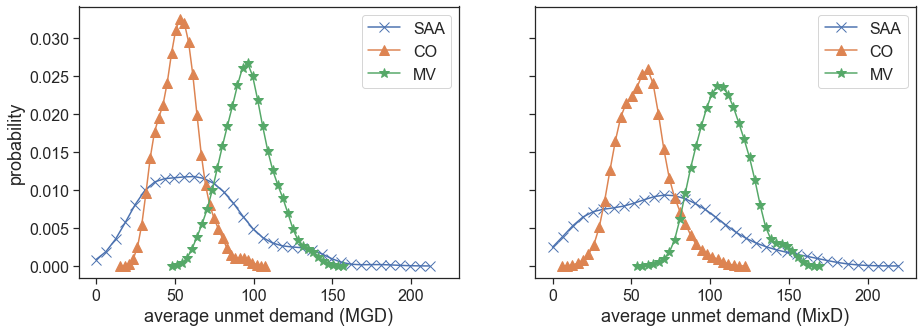

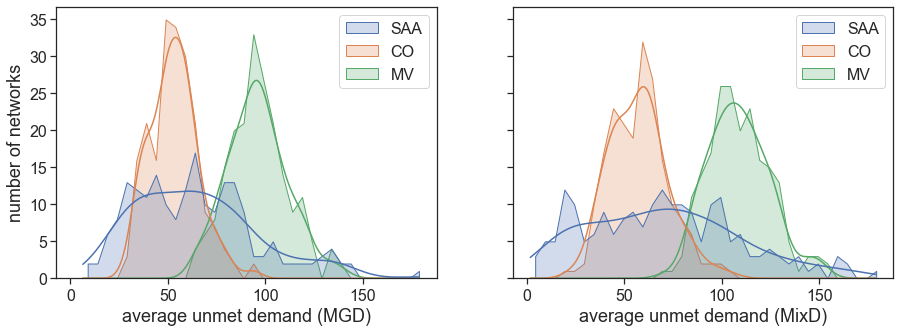

In [16]:
sns.set_style('ticks')
f, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
f.set_size_inches(15, 5)
markers = {'SAA': 'x',
          'CO': '^',
          'MV': '*'}
palette = {'SAA': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
          'CO': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
          'MV': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)}
for k, suffiex in enumerate(['', '_outsample']):
    for m in ['SAA', 'CO', 'MV']:
        ax = sns.kdeplot(x='unmet_demand'+suffiex,
                        data=df.query(f'model=="{m}"').groupby(['graph', 'model'], as_index=False).mean(),
                         color=palette[m],
                         gridsize=35,
                         ax=axes[k],
                         clip=[0, 5000],
                        **{'marker': markers[m],
                          'markersize':10},)
    axes[k].legend(['SAA', 'CO', 'MV'])
    if k == 0:
        ax.set_xlabel('average unmet demand (MGD)')
    else:
        ax.set_xlabel('average unmet demand (MixD)')
    ax.set_ylabel('probability')
f.savefig('D:/[PAPER]NetworkDesign Distributionally Robust/paper/pictures/avg_unmet_demand_88_default.pdf', dpi=180, quality=95)
    
f, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
f.set_size_inches(15, 5)
for k, suffiex in enumerate(['', '_outsample']):
    ax = sns.histplot(x='unmet_demand'+suffiex,
                     hue='model', hue_order=['SAA', 'CO','MV'],
                     stat='count', multiple='layer',
                     element='poly', kde=True,
                     binwidth=5,
                    data=df.groupby(['graph', 'model'], as_index=False).mean(),
                     ax=axes[k])
    ax.get_legend().set_title('')
    if k == 0:
        ax.set_xlabel('average unmet demand (MGD)')
    else:
        ax.set_xlabel('average unmet demand (MixD)')
    ax.set_ylabel('number of networks')

### 95, 99 unmet demand quantile

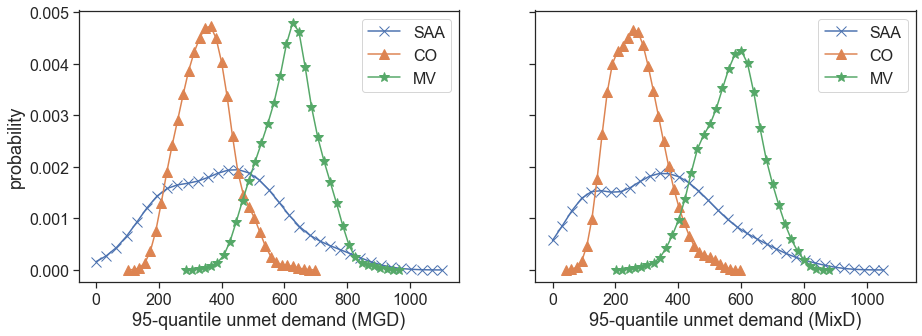

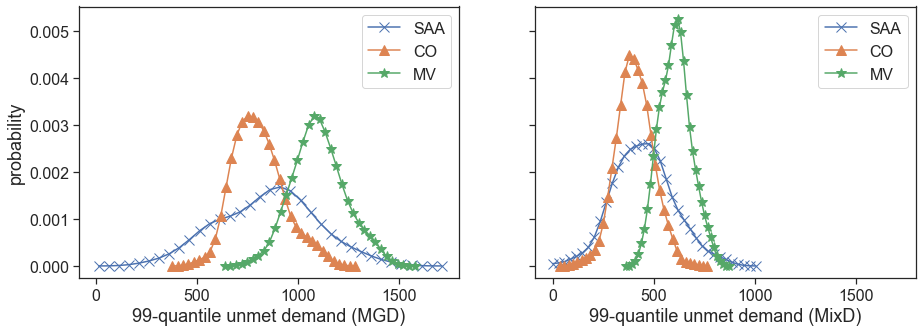

In [17]:
sns.set_style('ticks')
for quantile in [95, 99]:
    f, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
    f.set_size_inches(15, 5)
    markers = {'SAA': 'x',
              'CO': '^',
              'MV': '*'}
    palette = {'SAA': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
              'CO': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
              'MV': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)}

    for k, suffiex in enumerate(['', '_outsample']):
        for m in ['SAA', 'CO', 'MV']:
            ax = sns.kdeplot(x='unmet_demand'+suffiex,
                            data=df.query(f'model=="{m}"').groupby(['graph', 'model'], as_index=False).quantile(quantile/100),
                             color=palette[m],
                             gridsize=35,
                             ax=axes[k],
                             clip=[0,3000],
                            **{'marker': markers[m],
                              'markersize':10},)
        axes[k].legend(['SAA', 'CO', 'MV'])
        if k == 0:
            ax.set_xlabel(f'{quantile}-quantile unmet demand (MGD)')
        else:
            ax.set_xlabel(f'{quantile}-quantile unmet demand (MixD)')
        ax.set_ylabel('probability')
    f.savefig(f'D:/[PAPER]NetworkDesign Distributionally Robust/paper/pictures/{quantile}quantile_unmet_demand_88_default.pdf', dpi=180, quality=95)

## service level

In [248]:
df.groupby(['model', 'graph'], as_index=False).mean().groupby('model').mean()[['fulfill_rate', 'event_fulfill_rate',
                                                                              'fulfill_rate_outsample', 'event_fulfill_rate_outsample']]

,fulfill_rate,event_fulfill_rate,fulfill_rate_outsample,event_fulfill_rate_outsample
model,,,,
CO,0.989956,0.956063,0.988482,0.943164
MV,0.981558,0.938188,0.978462,0.930971
SAA,0.987625,0.947872,0.985884,0.937536


In [ ]:
['utilization_rate', 'fulfill_rate', 'event_fulfill_rate',
       'unmet_demand', 'cnt', 'model', 'obj', 'f', 'h', 'sum_I', 'sum_Z',
       'rho', 'cv', 'kappa', 'cpu_time', 'graph', 'utilization_rate_outsample',
       'fulfill_rate_outsample', 'event_fulfill_rate_outsample',
       'unmet_demand_outsample', 'total_cost', 'obj_second_stage',
       'total_demand', 'unfulfill_rate', 'total_cost_outsample',
       'obj_second_stage_outsample', 'total_demand_outsample',
       'unfulfill_rate_outsample']

## 95,90,85 quantile -- avg(200graphs' 95quantile)

In [40]:
print(df.groupby(['model', 'graph'], as_index=False).quantile(0.999).groupby(['model']).mean()\
[['unmet_demand',  'unfulfill_rate', 'unmet_demand_outsample', 'unfulfill_rate_outsample']])
print('---------------------------')

print(df.groupby(['model', 'graph'], as_index=False).quantile(0.95).groupby(['model']).mean()\
[['unmet_demand',  'unfulfill_rate', 'unmet_demand_outsample', 'unfulfill_rate_outsample']])
print('---------------------------')

print(df.groupby(['model', 'graph'], as_index=False).quantile(0.90).groupby(['model']).mean()\
[['unmet_demand', 'unfulfill_rate', 'unmet_demand_outsample', 'unfulfill_rate_outsample']])
print('---------------------------')

print(df.groupby(['model', 'graph'], as_index=False).quantile(0.85).groupby(['model']).mean()\
[['unmet_demand', 'unfulfill_rate', 'unmet_demand_outsample', 'unfulfill_rate_outsample']])
print('---------------------------')

print(df.groupby(['model', 'graph'], as_index=False).quantile(0.80).groupby(['model']).mean()\
[['unmet_demand', 'unfulfill_rate', 'unmet_demand_outsample', 'unfulfill_rate_outsample']])

       unmet_demand  unfulfill_rate  unmet_demand_outsample  \
model                                                         
CO      1280.003717        0.205196              761.792603   
MV      1585.027603        0.254249              968.781221   
SAA     1323.297752        0.212413              798.282192   

       unfulfill_rate_outsample  
model                            
CO                     0.142413  
MV                     0.176009  
SAA                    0.148720  
---------------------------
       unmet_demand  unfulfill_rate  unmet_demand_outsample  \
model                                                         
CO       350.935807        0.067655              267.937273   
MV       617.842874        0.118191              569.690535   
SAA      406.361983        0.078438              335.449253   

       unfulfill_rate_outsample  
model                            
CO                     0.052184  
MV                     0.109451  
SAA                    0.065408  


Text(0.5, 0, '')

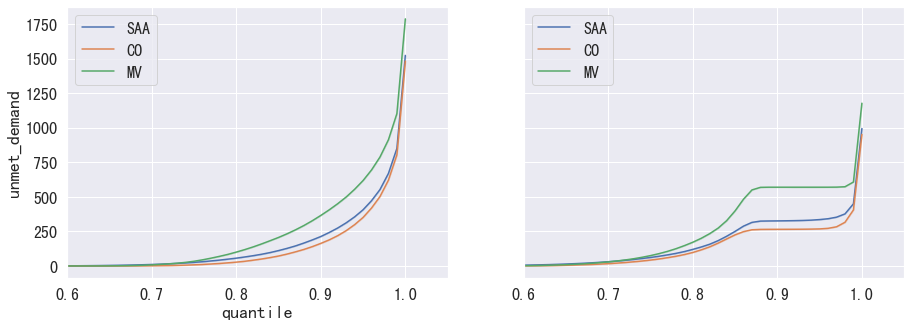

In [244]:
# figure
tmp_df = []
for q in np.linspace(0, 1, 101):
    _ = df.groupby(['model', 'graph'], as_index=False).quantile(q)[['model', 'graph', 'unmet_demand', 'unmet_demand_outsample',
                                                                               'unfulfill_rate', 'unfulfill_rate_outsample']]
    _['quantile'] = q
    tmp_df.append(_)
tmp_df = pd.concat(tmp_df, ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
fig.set_size_inches(15, 5)
for k, suffix in enumerate(['', '_outsample']):
    ax = sns.lineplot(x='quantile',
                 y='unmet_demand'+suffix,
                 hue='model', hue_order=['SAA', 'CO','MV'],
                data = tmp_df,
                  ci=0,
                ax = axes[k])
    ax.get_legend().set_title('')
    ax.legend(loc='upper left')
ax.set(**{'xlim':(0.6, 1.05)})
ax.set_xlabel('')

## cpu time

In [4]:
print(df.groupby(['model']).mean()[['node', 'cpu_time', 'speedup_cpu_time', 'speedup_node']])
print(df.groupby(['model']).std()[['node', 'cpu_time', 'speedup_cpu_time', 'speedup_node']])

        node    cpu_time  speedup_cpu_time  speedup_node
model                                                   
CO     98.80  748.791912           337.302         44.09
MV     43.88  355.552320            -1.000         -1.00
SAA    -1.00    0.047522            -1.000         -1.00
            node    cpu_time  speedup_cpu_time  speedup_node
model                                                       
CO     30.199413  230.140230         88.970118     11.714631
MV     10.519798   88.573517          0.000000      0.000000
SAA     0.000000    0.020223          0.000000      0.000000


# Sensitivity Analysis

In [3]:
df = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/88/e_result_sensitivity.csv')
for suffiex in ['', '_outsample']:
    df['total_cost'+suffiex] = df['f'] + df['h'] + df['unmet_demand'+suffiex]
    df['obj_second_stage'+suffiex] = df['obj'] - df['f'] - df['h']
    df['total_demand'+suffiex] =  np.fmax(df['sum_I']*df['utilization_rate'+suffiex], df['unmet_demand'+suffiex]/(1-df['fulfill_rate'+suffiex]))
    df.loc[df['total_demand'+suffiex]==np.inf, 'total_demand'+suffiex] = df['utilization_rate'+suffiex] * df['sum_I']
    df['unfulfill_rate'+suffiex] = 1 - df['fulfill_rate'+suffiex]
df.loc[df['model']=='co', 'model'] = 'CO'
df.loc[df['model']=='mv', 'model'] = 'MV'
df.loc[df['model']=='saa', 'model'] = 'SAA'
df.loc[df['model']=='det', 'model'] = 'DET'
print(df.shape)
print(df.info())

(4350000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350000 entries, 0 to 4349999
Data columns (total 31 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   utilization_rate              float64
 1   fulfill_rate                  float64
 2   event_fulfill_rate            float64
 3   unmet_demand                  float64
 4   cnt                           int64  
 5   model                         object 
 6   obj                           float64
 7   f                             float64
 8   h                             float64
 9   sum_I                         float64
 10  sum_Z                         float64
 11  rho                           float64
 12  cv                            float64
 13  kappa                         float64
 14  cpu_time                      float64
 15  graph                         int64  
 16  utilization_rate_outsample    float64
 17  fulfill_rate_outsample        float64
 18  event_fu

## goupby (model, graph, cv, rho, kappa)

In [4]:
data = df.groupby(by=['graph', 'model', 'rho', 'cv', 'kappa'], as_index=False).mean()
print(data.shape)
data.head()

(4350, 31)


,graph,model,rho,cv,kappa,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,...,speedup_node,node,total_cost,obj_second_stage,total_demand,unfulfill_rate,total_cost_outsample,obj_second_stage_outsample,total_demand_outsample,unfulfill_rate_outsample
0,0,CO,0.05,0.3,1.0,0.806390,0.991617,0.953750,39.649059,499.5,...,-1.0,57.0,744.353465,160.660087,4114.621666,0.008383,785.353992,160.660087,4188.197427,0.015816
1,0,CO,0.10,0.3,1.0,0.805283,0.991121,0.951125,43.314175,499.5,...,-1.0,57.0,752.765705,165.884021,4144.382858,0.008879,781.073320,165.884021,4191.575021,0.014112
2,0,CO,0.15,0.3,1.0,0.802081,0.989823,0.949125,52.008685,499.5,...,-1.0,55.0,765.868916,170.847651,4166.211211,0.010177,770.986970,170.847651,4137.978211,0.011428
3,0,CO,0.20,0.3,1.0,0.791361,0.990630,0.948750,47.560701,499.5,...,-1.0,53.0,765.548167,175.561220,4134.081750,0.009370,777.116523,175.561220,4181.649467,0.011648
4,0,CO,0.25,0.3,1.0,0.785019,0.991727,0.953500,43.197588,499.5,...,-1.0,55.0,765.090094,180.081460,4122.727897,0.008273,770.153491,180.081460,4130.029659,0.009645


## rho

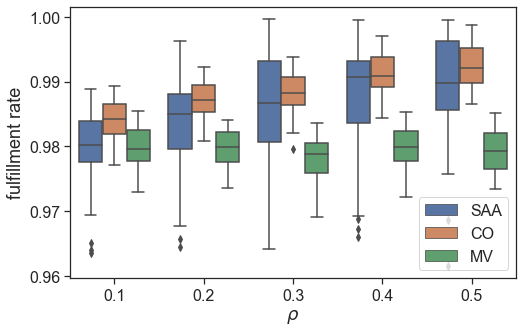

In [17]:
sns.set_style('ticks')
# fulfillment_rate
f, axes = plt.subplots(nrows=1, ncols=1)
f.set_size_inches(8, 5)
ax = sns.boxplot(x=r"rho", y="fulfill_rate_outsample", 
                hue='model', hue_order=['SAA', 'CO', 'MV'],
                ax = axes,
                data=data.query('cv==0.3&kappa==1.0&(rho==0.1|rho==0.2|rho==0.3|rho==0.4|rho==0.5)'))

ax.get_legend().set_title('')
ax.legend(loc='lower right')
ax.set_ylabel('fulfillment rate')
ax.set_xlabel(r'$\rho$')
f.savefig('avg_fulfillment_rate_88_rho_sensitivity.pdf', dpi=180, quality=95)

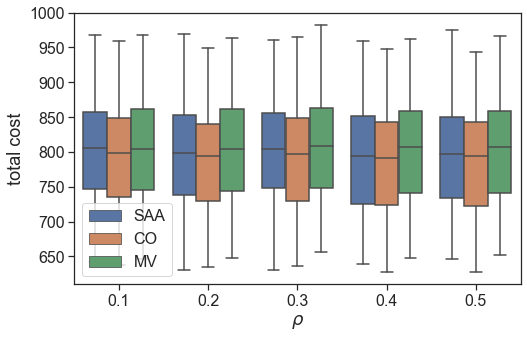

In [18]:
# total cost
f, axes = plt.subplots(nrows=1, ncols=1)
f.set_size_inches(8, 5)
ax = sns.boxplot(x="rho", y="total_cost_outsample", 
                hue='model', hue_order=['SAA', 'CO', 'MV'],
                ax = axes,
                data=data.query('cv==0.3&kappa==1.0&(rho==0.1|rho==0.2|rho==0.3|rho==0.4|rho==0.5)'))

ax.get_legend().set_title('')
ax.legend(loc='lower left')
ax.set_ylabel('total cost')
ax.set_xlabel(r'$\rho$')
f.savefig('avg_total_cost_88_rho_sensitivity.pdf', dpi=180, quality=95)

## cv

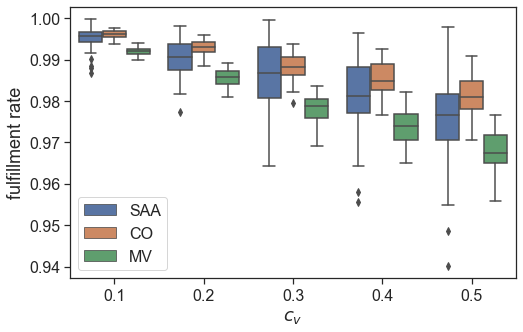

In [19]:
f, axes = plt.subplots(nrows=1, ncols=1)
f.set_size_inches(8, 5)
ax = sns.boxplot(x="cv", y="fulfill_rate_outsample", 
                hue='model', hue_order=['SAA', 'CO', 'MV'],
                ax = axes,
                data=data.query('rho==0.3&kappa==1.0&(cv==0.1|cv==0.2|cv==0.3|cv==0.4|cv==0.5)'))

ax.get_legend().set_title('')
ax.legend(loc='lower left')
ax.set_ylabel('fulfillment rate')
ax.set_xlabel(r'$c_v$')
f.savefig('avg_fulfillment_rate_88_cv_sensitivity.pdf', dpi=180, quality=95)

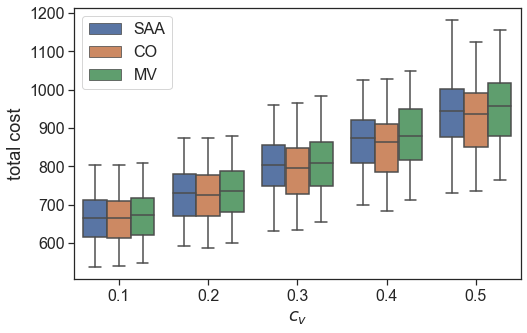

In [20]:
f, axes = plt.subplots(nrows=1, ncols=1)
f.set_size_inches(8, 5)
ax = sns.boxplot(x="cv", y="total_cost_outsample", 
                hue='model', hue_order=['SAA', 'CO', 'MV'],
                ax = axes,
                data=data.query('rho==0.3&kappa==1.0&(cv==0.1|cv==0.2|cv==0.3|cv==0.4|cv==0.5)'))

ax.get_legend().set_title('')
ax.legend(loc='upper left')
ax.set_ylabel('total cost')
ax.set_xlabel(r'$c_v$')
f.savefig('avg_total_cost_88_cv_sensitivity.pdf', dpi=180, quality=95)

## kappa

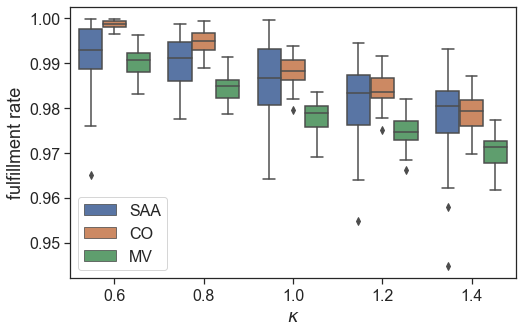

In [29]:
f, axes = plt.subplots(nrows=1, ncols=1)
f.set_size_inches(8, 5)
ax = sns.boxplot(x="kappa", y="fulfill_rate_outsample", 
                hue='model', hue_order=['SAA', 'CO', 'MV'],
                ax = axes,
                data=data.query('rho==0.3&cv==0.3&(kappa==0.6|kappa==0.8|kappa==1.0|kappa==1.2|kappa==1.4)'))

ax.get_legend().set_title('')
ax.legend(loc='lower left')
ax.set_ylabel('fulfillment rate')
ax.set_xlabel(r'$\kappa$')
f.savefig('avg_fulfillment_rate_88_kappa_sensitivity.pdf', dpi=180, quality=95)

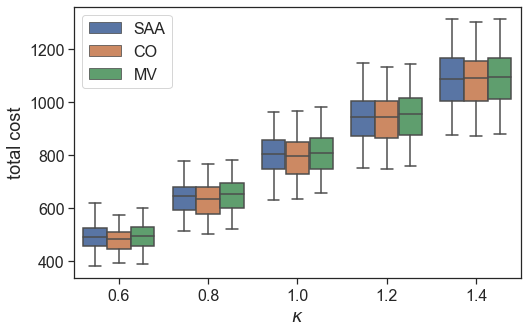

In [30]:
f, axes = plt.subplots(nrows=1, ncols=1)
f.set_size_inches(8, 5)
ax = sns.boxplot(x="kappa", y="total_cost_outsample", 
                hue='model', hue_order=['SAA', 'CO', 'MV'],
                ax = axes,
                data=data.query('rho==0.3&cv==0.3&(kappa==0.6|kappa==0.8|kappa==1.0|kappa==1.2|kappa==1.4)'))

ax.get_legend().set_title('')
ax.legend(loc='upper left')
ax.set_ylabel('total cost')
ax.set_xlabel(r'$\kappa$')
f.savefig('avg_total_cost_88_kappa_sensitivity.pdf', dpi=180, quality=95)